# Lectura de Corpus Sentences

In [62]:
from gensim.test.utils import datapath
from gensim import utils
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import multiprocessing
from time import time

class MyCorpus(object):

    def __iter__(self):
        for i, line in enumerate(open('./Vocabulario/resumenes_lemas.txt')):
            # assume there's one document per line, tokens separated by whitespace
            normalizar = str.maketrans('áéíóúü','aeiouu')
            tokens = utils.simple_preprocess(line.translate(normalizar).lower())
            yield TaggedDocument(tokens, [i])

In [65]:
resumenes = MyCorpus()
# f = list(resumenes)
# f[421]

# Definicion de Modelo

In [3]:
def entrenamiento(sentences):
        
             
        #Entrenamiento del modelo
        cores = multiprocessing.cpu_count() #cuenta el nro de nucles de la pc

        d2v = Doc2Vec(vector_size=300, #Dimensionalidad Palabras Vector
               window=5, #Contexto, distancia entre palabras predichas
               min_count=1, #Minimo de palabras a buscar
               workers=cores, #En mi CPU
               dm=0, #Usamos el Modelo PV-DBOW analogo a SkipGram
               dbow_words=1 ,#Entrenar el skip gram y documentos       
               hs=0, #Cero para negative sampling, castigo a neurona
               negative=20, #Palabras irrelevantes para el muestreo negativo
               ns_exponent=-0.5, #Muestrea frecuencias por igual,
               alpha=0.015, #Tasa de aprendizaje
               min_alpha=0.0001, #Tasa que se reducira durante el train
               seed=25, #Semilla generar hash para palabras
               max_vocab_size=None, #Dependera de la maquina 10M -> 1GB
               sample=5, #Reduccion para palabras con alta frecuencia
               epochs=150, #Epocas, valores altos sobreentreno )?
              )
        
        t = time()
        d2v.build_vocab(sentences, #Oraciones nuevas
               #update=True, #Agregar nuevo vocabulario
               progress_per=100000 #Palabras para procesar con antecipacion
              ) # prepare the model vocabulary
        print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))
        t = time()
        d2v.train(sentences, total_examples=d2v.corpus_count, epochs=d2v.epochs ,report_delay=3)
        print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))
        
        return d2v
        

**Entramiento modelo 1**

In [4]:
#Modelo V1 Entramiento con sentence = resumen
modelo = entrenamiento(resumenes)

Time to build vocab: 0.07 mins
Time to train the model: 11.77 mins


# Modelos y Cambios
- Modelo 1(Sin tildes): Original

- Modelo SK 20 epoch: 2.47min

- Modelo 2 Final(Lemas): Original 11 min 

In [63]:
modelo = Doc2Vec.load("./Modelos/modelo2_FINALD2V.model")

In [5]:
modelo.save("./Modelos/modelo2FINALD2V.model")

In [55]:
modelo.delete_temporary_training_data(keep_doctags_vectors=False, keep_inference=True)

In [6]:
memory = modelo.estimate_memory()
memory['total']/1000000

33.7317

In [44]:
modelo.corpus_total_words

84185

In [44]:
title = list(modelo.docvecs.most_similar([palabras]))
title[0][0]

317

In [75]:
help(modelo.docvecs.closer_than)

Help on method closer_than in module gensim.models.keyedvectors:

closer_than(entity1, entity2) method of gensim.models.keyedvectors.Doc2VecKeyedVectors instance
    Get all entities that are closer to `entity1` than `entity2` is to `entity1`.



In [154]:
modelo.docvecs.distance()

array([], shape=(0, 300), dtype=float64)

In [118]:
help(modelo.docvecs.most_similar_to_given)

Help on method most_similar_to_given in module gensim.models.keyedvectors:

most_similar_to_given(entity1, entities_list) method of gensim.models.keyedvectors.Doc2VecKeyedVectors instance
    Get the `entity` from `entities_list` most similar to `entity1`.



In [103]:
# help(modelo.docvecs.most_similar_to_given)
#Mas similiar a una lista dada
tags=[]
for resumen in resumenes:
    tags.append(resumen.tags[0])

modelo.docvecs.most_similar_to_given(title[1].tags[0], tags)


1

In [138]:
#Distancia Coseno Etiquetas 
modelo.docvecs.n_similarity([421], [423])

0.2962894

In [180]:
modelo.docvecs.similarity(442, 442)

1.0

In [181]:
modelo.docvecs.vector_size

300

In [179]:
palabras = modelo.infer_vector(['gestor', 'conocimiento'])
title = list(resumenes)
for documento in modelo.docvecs.most_similar([palabras], topn=171):
    tag = documento[0]
    print(f'{tag}')

442
421
437
416
434
138
444
424
336
64
305
443
20
310
406
315
23
196
435
314
185
288
289
183
182
181
184
389
318
19
290
43
10
295
239
309
122
48
192
18
402
409
220
403
257
343
115
436
265
317
58
419
275
198
380
215
291
375
373
271
374
362
267
348
260
214
259
370
445
233
47
160
379
321
123
323
105
249
149
341
248
142
360
236
429
110
438
367
286
234
404
21
237
450
40
337
413
133
293
39
307
136
270
300
27
57
36
440
298
262
95
292
334
296
200
372
405
218
167
90
101
51
70
17
439
297
266
103
410
59
342
76
250
108
41
99
107
332
9
306
98
369
84
219
201
449
325
25
75
245
28
42
121
345
102
205
52
378
127
264
241
333
313
213
13
412
312
407
0
180
139


In [170]:
palabras = modelo.infer_vector(['gestor', 'conocimiento'])
title = list(resumenes)
for documento in modelo.docvecs.most_similar([palabras], topn=30):
    tag = documento[0]
    print(f'{documento}--------{title[tag].words[:10]}')

(442, 0.6646066308021545)--------['umayux', 'modelo', 'software', 'gestion', 'conocimiento', 'soportados', 'ontologias', 'dinamica', 'debilmente', 'acoplados']
(437, 0.6272861957550049)--------['sitapp', 'aplicacion', 'inteligente', 'dispositivos', 'moviles', 'sistema', 'rutas', 'transporte', 'urbano', 'municipio']
(421, 0.616849422454834)--------['motor', 'busqueda', 'inteligente', 'informes', 'investigacion', 'basado', 'recursos', 'semanticos', 'sistema', 'investigaciones']
(416, 0.6109544038772583)--------['makipuray', 'herramientas', 'web', 'inteligencia', 'negocios', 'descubrimiento', 'conocimiento', 'orientadas', 'pyme', 'departamento']
(434, 0.6083847284317017)--------['rikhuna', 'visor', 'cartograficos', 'inteligente', 'direcciones', 'urbanas', 'sitios', 'interes', 'municipio', 'pasto']
(138, 0.5699188113212585)--------['evaluacion', 'actividad', 'antimicrobiana', 'peperomia', 'subspathulata', 'cordia', 'acuta', 'determinar', 'actividad', 'antimicrobiana']
(336, 0.5388919115066

In [10]:
word='universidad'
modelo.wv.similar_by_word(word, topn=20, restrict_vocab=None)

[('nariño', 0.7877243757247925),
 ('departamento', 0.4218704104423523),
 ('torobajo', 0.3928261399269104),
 ('titulo', 0.3924299478530884),
 ('facultad', 0.3876037895679474),
 ('renovable', 0.38651135563850403),
 ('centigrados', 0.38105979561805725),
 ('directivas', 0.3809777796268463),
 ('monetaria', 0.38056230545043945),
 ('panamericana', 0.3797394335269928),
 ('seccional', 0.37943023443222046),
 ('sedes', 0.3785218596458435),
 ('acepciones', 0.3775959610939026),
 ('cesmag', 0.37629514932632446),
 ('amazonas', 0.3750463128089905),
 ('lebcinea', 0.3721972703933716),
 ('teorizacion', 0.3715437054634094),
 ('aproximada', 0.3714926242828369),
 ('fortalecerlas', 0.3709632456302643),
 ('dogmaticas', 0.3690212666988373)]

In [9]:
modelo1.wv.most_similar(['metodologias', 'software', 'agiles'])

[('departamento', 0.5705779790878296),
 ('facultad', 0.41706305742263794),
 ('torobajo', 0.4154338240623474),
 ('renovable', 0.41525065898895264),
 ('sede', 0.414725661277771),
 ('seccional', 0.4079064726829529),
 ('workshops', 0.4065971374511719),
 ('resumen', 0.40438663959503174),
 ('amazonas', 0.40402090549468994),
 ('conferencia', 0.40248796343803406)]

In [6]:
modelo1.get_latest_training_loss()

0.0

In [70]:
modelo1.wv.most_similar_cosmul(positive=['programacion', 'eventos'], negative=['programacion', 'software'])

[('severamente', 1.3137038946151733),
 ('conocidas', 1.3051598072052002),
 ('hidroclimaticos', 1.2963074445724487),
 ('carnavales', 1.2865322828292847),
 ('heladas', 1.286263108253479),
 ('mutuamente', 1.278388261795044),
 ('excluyentes', 1.275891900062561),
 ('eliminando', 1.2676161527633667),
 ('afectada', 1.2540453672409058),
 ('cumulo', 1.2536296844482422)]

In [16]:
modelo1.wv.similarity('inteligencia', 'artificial')

0.59623563

In [31]:
modelo1.total_train_time

456.51715938696725

/home/sangeeky/anaconda3/envs/tesis/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


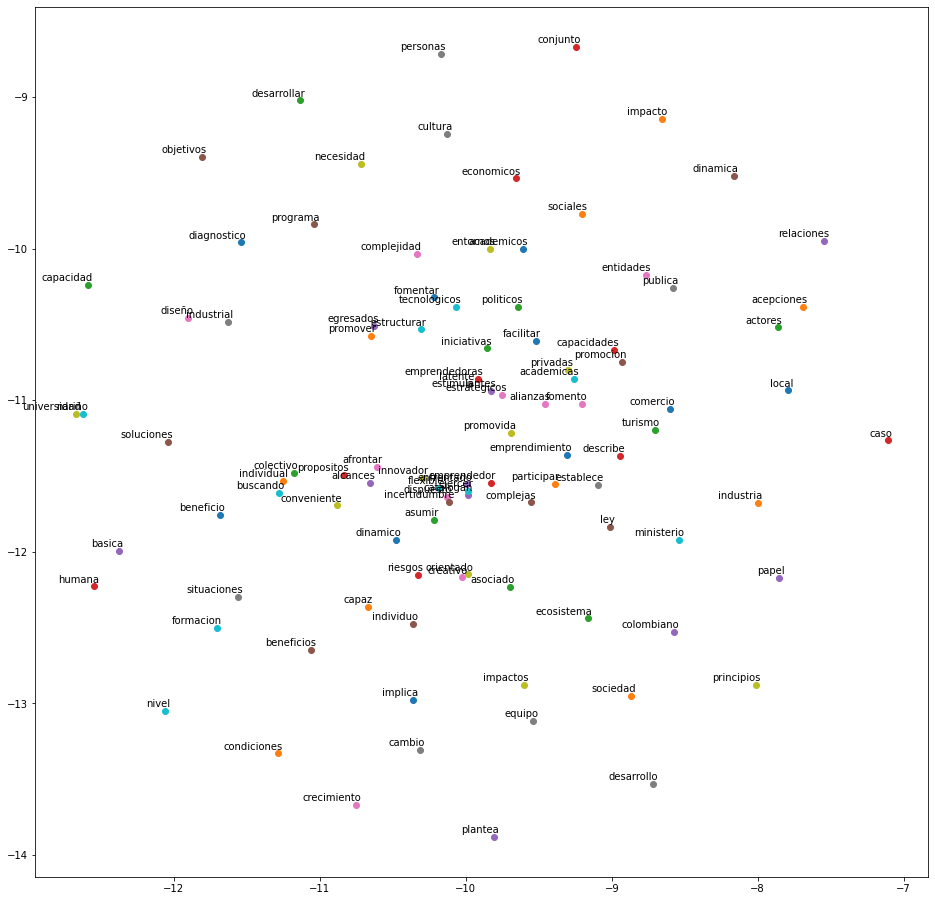

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for counter, word in enumerate(model.wv.vocab):
        if counter == 100:
            break
        tokens.append(model[word])
        labels.append(word)
        

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

    
grafica = Word2Vec.load('./Modelos/modelo9.model')
tsne_plot(grafica)

In [1]:
d2v = Doc2Vec(size=300, #Dimensionalidad Palabras Vector
               window=5, #Contexto, distancia entre palabras predichas
               min_count=1, #Minimo de palabras a buscar
               workers=cores, #En mi CPU
               dm=0, #Usamos el Modelo PV-DBOW analogo a SkipGram
               dbow_words=1 ,#Entrenar el skip gram y documentos       
               hs=0, #Cero para negative sampling, castigo a neurona
               negative=20, #Palabras irrelevantes para el muestreo negativo
               ns_exponent=-0.5, #Muestrea frecuencias por igual,
               alpha=0.015, #Tasa de aprendizaje
               min_alpha=0.0001, #Tasa que se reducira durante el train
               seed=25, #Semilla generar hash para palabras
               max_vocab_size=None, #Dependera de la maquina 10M -> 1GB
               sample=5, #Reduccion para palabras con alta frecuencia
               epochs=150, #Epocas, valores altos sobreentreno )?
               compute_loss=True #Muestra valor de perdida en el train
              )

In [5]:
w2v.build_vocab(corpus_file='./Data/resumenes.txt')

In [ ]:
#Vocabulario con Diccionario de freq
w2v.build_vocab_from_freq(dictionary_resumenes)
#Voacabulario con letras
#w2v.build_vocab(setences, #Oraciones nuevas
#                corpus_file=path #txt
#                update=True, #Agregar nuevo vocabulario
#                progress_per=100000 #Palabras para procesar con antecipacion
#                 min_count=1
#               )


In [ ]:
w2v.train(sentences, total_examples=w2v.corpus_count, report_delay=3)

In [ ]:
# Lectura de Corpus Sentences

from gensim.test.utils import datapath
from gensim import utils
from gensim.models import Word2Vec
import multiprocessing
from time import time

class MyCorpus(object):

    def __iter__(self):
        for line in open('./Data/resumenes2.txt'):
            # assume there's one document per line, tokens separated by whitespace
            normalizar = str.maketrans('áéíóúü','aeiouu')
            yield utils.simple_preprocess(line.translate(normalizar).lower())

resumenes = MyCorpus()
# f = list(resumenes)
# f[:3]

### Crear oraciones

from gensim.models.phrases import Phrases, Phraser


#Crea las frases relevantes de la lista de oraciones:
phrases = Phrases(resumenes, min_count=1, threshold=1,progress_per=10000)
# for i, p in enumerate(phrases):
#     if i > 2: break
#     print(p)
#Transforme el corpus en función de las bigramas detectadas:
bigram = Phraser(phrases)
sentences = bigram[resumenes]
sentences

sentences = phrases[resumenes]

for i, p in enumerate(sentences):
    if i > 0: break
    print(p)

# Definicion de Modelo

def entrenamiento(sentences):
        
             
        #Entrenamiento del modelo
        cores = multiprocessing.cpu_count() #cuenta el nro de nucles de la pc

        w2v = Word2Vec(size=300, #Dimensionalidad Palabras Vector
               window=5, #Contexto, distancia entre palabras predichas
               min_count=1, #Minimo de palabras a buscar
               workers=cores, #En mi CPU
               sg=1, #Usamos el Modelo SkipGram
               hs=0, #Cero para negative sampling, castigo a neurona
               negative=20, #Palabras irrelevantes para el muestreo negativo
               ns_exponent=-0.5, #Muestrea frecuencias por igual,
               alpha=0.015, #Tasa de aprendizaje
               min_alpha=0.0001, #Tasa que se reducira durante el train
               seed=25, #Semilla generar hash para palabras
               max_vocab_size=None, #Dependera de la maquina 10M -> 1GB
               sample=5, #Reduccion para palabras con alta frecuencia
               iter=150, #Epocas, valores altos sobreentreno )?
               compute_loss=True #Muestra valor de perdida en el train
              )
        
        t = time()
        w2v.build_vocab(sentences, #Oraciones nuevas
               #update=True, #Agregar nuevo vocabulario
               progress_per=100000, #Palabras para procesar con antecipacion
               min_count=1
              ) # prepare the model vocabulary
        print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))
        t = time()
        w2v.train(sentences, total_examples=w2v.corpus_count, epochs=w2v.iter ,report_delay=3)
        print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))
        
        return w2v
        

**Entramiento modelo 1**

#Modelo V1 Entramiento con sentence = resumen
modelo1 = entrenamiento(resumenes)

# Modelos y Cambios
- Modelo 1: Original 7 Min Bacano
- Modelo 2: 500 Epocas 18 Min
- Modelo 3: 1000 Epocas 38 Min
- Modelo 4: Alpha 0,0015 - 0,0001 iter=150  6 Min Bacano
- Modelo 5: Window=5, Alpha 0,0015 - 0,0001 iter=150 9 Min Me gusta mas
- Modelo 6: Window=5, Alpha 0,0015 - 0,0001 iter=500 26 No gusta
- MOdelo 7: Window=5, Alpha 0,0015 - 0,0001 ns_exponent=-0.5 iter=150 HERMOSOOO
- Modelo 8(Sin tildes): Window=5, Alpha 0,0015 - 0,0001 ns_exponent=-0.5 iter=150
- Modelo 9(Sin Autores): Window=5, Alpha 0,0015 - 0,0001 ns_exponent=-0.5 iter=150

modelo1 = Word2Vec.load("./Modelos/modelo9.model")

modelo1.save("./Modelos/modelo9.model")

word='universidad'
modelo1.wv.similar_by_word(word, topn=20, restrict_vocab=None)

modelo1.wv.most_similar(['universidad', 'nariño'])

modelo1.get_latest_training_loss()

modelo1.wv.most_similar_cosmul(positive=['programacion', 'eventos'], negative=['programacion', 'software'])

modelo1.wv.similarity('inteligencia', 'artificial')

modelo1.total_train_time

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for counter, word in enumerate(model.wv.vocab):
        if counter == 100:
            break
        tokens.append(model[word])
        labels.append(word)
        

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

    
grafica = Word2Vec.load('./Modelos/modelo9.model')
tsne_plot(grafica)

w2v = Word2Vec(size=300, #Dimensionalidad Palabras Vector
               window=3, #Contexto, distancia entre palabras predichas
               min_count=1, #Minimo de palabras a buscar
               workers=4, #En mi CPU
               sg=1, #Usamos el Modelo SkipGram
               hs=0, #Cero para negative sampling, castigo a neurona
               negative=20, #Palabras irrelevantes para el muestreo negativo
               ns_exponent=0, #Muestrea frecuencias por igual,
               alpha=0.025, #Tasa de aprendizaje
               min_alpha=0.0005, #Tasa que se reducira durante el train
               seed=25, #Semilla generar hash para palabras
               max_vocab_size=None, #Dependera de la maquina 10M -> 1GB
               sample=5, #Reduccion para palabras con alta frecuencia
               iter=150, #Epocas, valores altos sobreentreno )?
               compute_loss=True #Muestra valor de perdida en el train
              )

w2v.build_vocab(corpus_file='./Data/resumenes.txt')

#Vocabulario con Diccionario de freq
w2v.build_vocab_from_freq(dictionary_resumenes)
#Voacabulario con letras
#w2v.build_vocab(setences, #Oraciones nuevas
#                corpus_file=path #txt
#                update=True, #Agregar nuevo vocabulario
#                progress_per=100000 #Palabras para procesar con antecipacion
#                 min_count=1
#               )


w2v.train(sentences, total_examples=w2v.corpus_count, report_delay=3)